In [18]:
import tensorflow as tf
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

input_x_dim = x_train.shape[1]
input_y_dim = x_train.shape[2]
input_dim = input_x_dim * input_y_dim

x_train = tf.reshape(x_train, (len(x_train), input_dim))
x_test = tf.reshape(x_test, (len(x_test), input_dim))

hidden_code_dim = 16

In [19]:
from image_vae import MLPVariationalAutoEncoder

In [20]:
model = MLPVariationalAutoEncoder(input_dim, hidden_code_dim)

In [21]:
model.train(x_train, x_test, 30, 512, tf.keras.optimizers.Adam(learning_rate=0.0001))

Epoch 1 of 30 completed, training loss = 0.14234015345573425, validation loss = 0.18723374605178833
Epoch 2 of 30 completed, training loss = 0.11028595268726349, validation loss = 0.15627197921276093
Epoch 3 of 30 completed, training loss = 0.11060627549886703, validation loss = 0.16010594367980957
Epoch 4 of 30 completed, training loss = 0.1106860488653183, validation loss = 0.15539494156837463
Epoch 5 of 30 completed, training loss = 0.07854890823364258, validation loss = 0.10537441074848175
Epoch 6 of 30 completed, training loss = 0.09616583585739136, validation loss = 0.1251101791858673
Epoch 7 of 30 completed, training loss = 0.0844593420624733, validation loss = 0.10790708661079407
Epoch 8 of 30 completed, training loss = 0.06932459026575089, validation loss = 0.09554828703403473
Epoch 9 of 30 completed, training loss = 0.08498220145702362, validation loss = 0.11384174972772598
Epoch 10 of 30 completed, training loss = 0.09878813475370407, validation loss = 0.12632715702056885
Ep

In [22]:
import matplotlib.pyplot as plt
import random

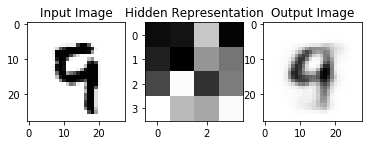

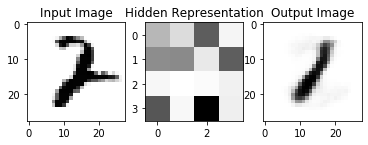

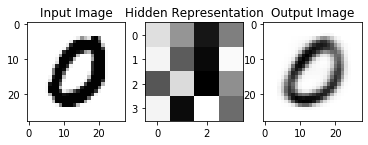

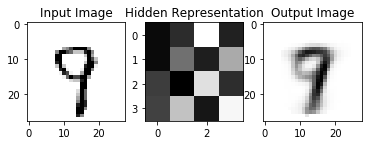

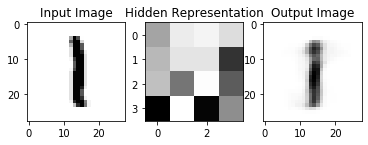

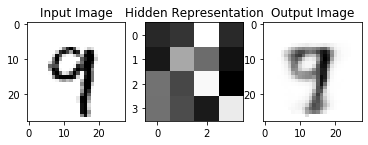

In [69]:
for _ in range(6):
    plt.subplot(1, 3, 1)
    plt.title("Input Image")
    test_case = x_test[random.randrange(x_test.shape[0])]
    test_case_img = tf.reshape(test_case, (1, input_x_dim, input_y_dim))[0] * 255.0
    plt.imshow(test_case_img, cmap='Greys')

    plt.subplot(1, 3, 2)
    plt.title("Hidden Representation")
    encoded_dist = model.encode([test_case])
    encoded = encoded_dist.sample()
    # The reshape command makes the 16-long hidden code by 4x4
    # so we can see it alongside the input and output
    encoded_img = tf.reshape(tf.nn.sigmoid(encoded), (1, 4, 4))[0] * 255.0
    plt.imshow(encoded_img, cmap='Greys')

    plt.subplot(1, 3, 3)
    plt.title("Output Image")
    decoded = model.decode([encoded])
    decoded_img = tf.reshape(decoded, (1, input_x_dim, input_y_dim))[0] * 255.0
    plt.imshow(decoded_img, cmap='Greys')

    plt.show()

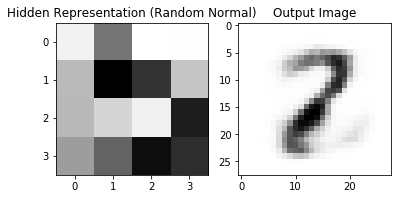

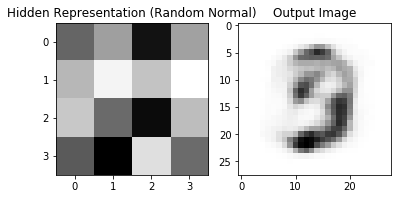

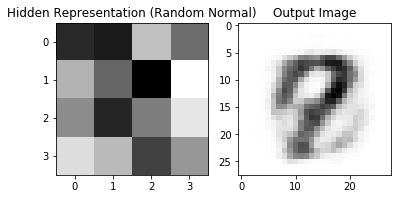

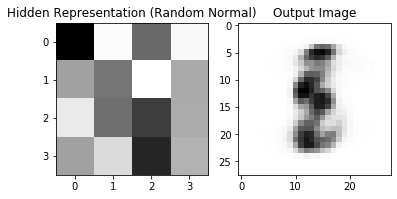

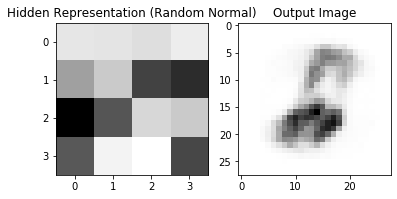

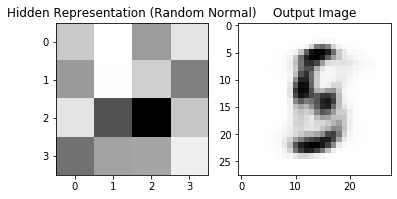

In [70]:
for _ in range(6):
    plt.subplot(1, 2, 1)
    plt.title("Hidden Representation (Random Normal)")
    random_encoded = tf.random.normal((1, 16))
    random_encoded_img = tf.reshape(tf.nn.sigmoid(random_encoded), (1, 4, 4))[0] * 255.0
    plt.imshow(random_encoded_img, cmap='Greys')

    plt.subplot(1, 2, 2)
    plt.title("Output Image")
    random_decoded = model.decode([random_encoded])
    random_decoded_img = tf.reshape(random_decoded, (1, input_x_dim, input_y_dim))[0] * 255.0
    plt.imshow(random_decoded_img, cmap='Greys')

    plt.show()

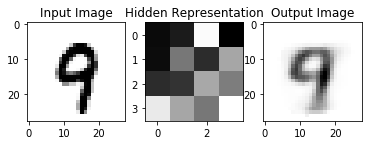

In [74]:
plt.subplot(1, 3, 1)
plt.title("Input Image")
test_case_1 = x_test[random.randrange(x_test.shape[0])]
test_case_img_1 = tf.reshape(test_case_1, (1, input_x_dim, input_y_dim))[0] * 255.0
plt.imshow(test_case_img_1, cmap='Greys')

plt.subplot(1, 3, 2)
plt.title("Hidden Representation")
encoded_dist_1 = model.encode([test_case_1])
encoded_1 = encoded_dist_1.sample()
# The reshape command makes the 16-long hidden code by 4x4
# so we can see it alongside the input and output
encoded_img_1 = tf.reshape(tf.nn.sigmoid(encoded_1), (1, 4, 4))[0] * 255.0
plt.imshow(encoded_img_1, cmap='Greys')

plt.subplot(1, 3, 3)
plt.title("Output Image")
decoded_1 = model.decode([encoded_1])
decoded_img_1 = tf.reshape(decoded_1, (1, input_x_dim, input_y_dim))[0] * 255.0
plt.imshow(decoded_img_1, cmap='Greys')

plt.show()

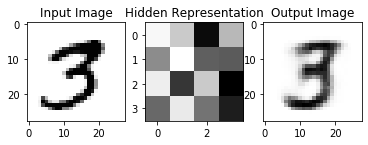

In [80]:
plt.subplot(1, 3, 1)
plt.title("Input Image")
test_case_2 = x_test[random.randrange(x_test.shape[0])]
test_case_img_2 = tf.reshape(test_case_2, (1, input_x_dim, input_y_dim))[0] * 255.0
plt.imshow(test_case_img_2, cmap='Greys')

plt.subplot(1, 3, 2)
plt.title("Hidden Representation")
encoded_dist_2 = model.encode([test_case_2])
encoded_2 = encoded_dist_2.sample()
# The reshape command makes the 16-long hidden code by 4x4
# so we can see it alongside the input and output
encoded_img_2 = tf.reshape(tf.nn.sigmoid(encoded_2), (1, 4, 4))[0] * 255.0
plt.imshow(encoded_img_2, cmap='Greys')

plt.subplot(1, 3, 3)
plt.title("Output Image")
decoded_2 = model.decode([encoded_2])
decoded_img_2 = tf.reshape(decoded_2, (1, input_x_dim, input_y_dim))[0] * 255.0
plt.imshow(decoded_img_2, cmap='Greys')

plt.show()

In [81]:
new_encoded = (encoded_1 + encoded_2) / 2

In [82]:
new_encoded

<tf.Tensor: id=4738593, shape=(1, 16), dtype=float32, numpy=
array([[-0.25821775,  0.25388226,  0.3033445 ,  0.5619329 ,  0.7025021 ,
        -0.99953496,  0.8022409 ,  0.30491516, -0.1946196 ,  1.0093324 ,
        -0.34770247,  1.1309543 , -0.12513933, -0.65547436,  0.34562445,
         0.10686642]], dtype=float32)>

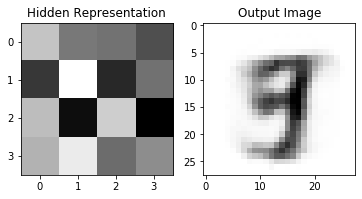

In [83]:
plt.subplot(1, 2, 1)
plt.title("Hidden Representation")
new_encoded_img = tf.reshape(tf.nn.sigmoid(new_encoded), (1, 4, 4))[0] * 255.0
plt.imshow(new_encoded_img, cmap='Greys')

plt.subplot(1, 2, 2)
plt.title("Output Image")
new_decoded = model.decode([new_encoded])
new_decoded_img = tf.reshape(new_decoded, (1, input_x_dim, input_y_dim))[0] * 255.0
plt.imshow(new_decoded_img, cmap='Greys')

plt.show()